In [173]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [174]:
mun=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\PARKINGS\municipios totales.csv")

In [175]:
mb=pd.read_csv(r"C:\Users\Emmanuel\OneDrive - Instituto Politecnico Nacional\GITHUB\charger-stations-data-cleaned\MB-STATIONS\MB_stations.csv")
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SISTEMA    304 non-null    object 
 1   NOMBRE     277 non-null    object 
 2   LINEA      304 non-null    int64  
 3   EST        300 non-null    float64
 4   CVE_EST    300 non-null    object 
 5   CVE_EOD17  214 non-null    float64
 6   TIPO       300 non-null    object 
 7   ALCALDIAS  304 non-null    object 
 8   AÃ‘O       304 non-null    int64  
 9   OID        304 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.9+ KB


In [176]:
mb.rename(columns={"AÃ‘O":"ANIO"}, inplace=True)
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SISTEMA    304 non-null    object 
 1   NOMBRE     277 non-null    object 
 2   LINEA      304 non-null    int64  
 3   EST        300 non-null    float64
 4   CVE_EST    300 non-null    object 
 5   CVE_EOD17  214 non-null    float64
 6   TIPO       300 non-null    object 
 7   ALCALDIAS  304 non-null    object 
 8   ANIO       304 non-null    int64  
 9   OID        304 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.9+ KB


In [177]:
mb.head()

,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,CVE_EOD17,TIPO,ALCALDIAS,ANIO,OID
0,Metrobús,NaN,4,41.0,MB0441,NaN,NaN,Venustiano Carranza,0,1
1,Metrobús,NaN,4,42.0,MB0442,NaN,NaN,Venustiano Carranza,0,2
2,Metrobús,Delegación Cuauhtémoc,4,2.0,MB0402,11121.0,Intermedia,Cuauhtémoc,2012,3
3,Metrobús,Delegación Cuauhtémoc,4,2.0,MB0402,11121.0,Intermedia,Cuauhtémoc,2012,4
4,Metrobús,México Tenochtitlan,4,3.0,MB0403,NaN,Intermedia,Cuauhtémoc,0,5


In [178]:
mb.dropna(subset=["TIPO"],inplace=True)
mb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 2 to 303
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SISTEMA    300 non-null    object 
 1   NOMBRE     277 non-null    object 
 2   LINEA      300 non-null    int64  
 3   EST        296 non-null    float64
 4   CVE_EST    296 non-null    object 
 5   CVE_EOD17  214 non-null    float64
 6   TIPO       300 non-null    object 
 7   ALCALDIAS  300 non-null    object 
 8   ANIO       300 non-null    int64  
 9   OID        300 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 25.8+ KB


In [179]:
mb.fillna({"EST":0, "CVE_EOD17":0, "NOMBRE":"Desconocido", "CVE_EST": "Desconocido"}, inplace=True)
mb[["EST","CVE_EOD17"]]=mb[["EST","CVE_EOD17"]].astype({"EST":"int64", "CVE_EOD17": "int64"})
mb.reset_index(drop=True, inplace=True)
mb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SISTEMA    300 non-null    object
 1   NOMBRE     300 non-null    object
 2   LINEA      300 non-null    int64 
 3   EST        300 non-null    int64 
 4   CVE_EST    300 non-null    object
 5   CVE_EOD17  300 non-null    int64 
 6   TIPO       300 non-null    object
 7   ALCALDIAS  300 non-null    object
 8   ANIO       300 non-null    int64 
 9   OID        300 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 23.6+ KB


In [180]:
pd.unique(mb.ALCALDIAS).tolist()

['Cuauhtémoc',
 'Venustiano Carranza',
 'Cuauhtémoc / Venustiano Carranza',
 'Venustiano Carranza / Iztacalco',
 'Venustiano Carranza / Estado de México - Nezahualcóyotl',
 'Gustavo A. Madero',
 'Benito Juárez',
 'Benito Juárez / Álvaro Obregón',
 'Álvaro Obregón',
 'Coyoacán',
 'Tlalpan',
 'Miguel Hidalgo',
 'Cuauhtémoc / Miguel Hidalgo',
 'Cuauhtémoc / Benito Juárez',
 'Iztacalco',
 'Iztapalapa',
 'Iztacalco / Iztapalapa',
 'Gustavo A. Madero / Estado de México - Tlalnepantla',
 'Gustavo A. Madero / Azcapotzalco',
 'Gustavo A. Madero / Estado de México - Ecatepec',
 'Coyoacán / Tlalpan',
 'Xochimilco',
 'Azcapotzalco',
 'Azcapotzalco / Estado de México - Tlalnepantla',
 'Gustavo A. Madero / Cuauhtémoc']

In [181]:
for line in pd.unique(mb.ALCALDIAS).tolist():
    extract=re.findall("^.*/",line) #Encuentra todos los caracteres hasta /, y el valor (encontrado o no) lo almacena en una lista
    if len(extract)>0: #Si la lista no está vacía (si se encontró la expresión regular) 
        new_line=extract[0].split("/")[0].rstrip() # Dame el valor 0 de la lista, separa por / de nuevo, dame el primer valor y 
        #quita el espacio en blanco de la derecha
        mb.ALCALDIAS.replace(line, new_line, inplace=True)

pd.unique(mb.ALCALDIAS).tolist()
        
    #mb.ALCALDIAS.replace(line,extract, inplace=True)




['Cuauhtémoc',
 'Venustiano Carranza',
 'Gustavo A. Madero',
 'Benito Juárez',
 'Álvaro Obregón',
 'Coyoacán',
 'Tlalpan',
 'Miguel Hidalgo',
 'Iztacalco',
 'Iztapalapa',
 'Xochimilco',
 'Azcapotzalco']

In [182]:
dict_mun=dict(mb[["ALCALDIAS","TIPO"]].value_counts())
dict_mun

{('Cuauhtémoc', 'Intermedia'): 75,
 ('Gustavo A. Madero', 'Intermedia'): 54,
 ('Cuauhtémoc', 'Transbordo'): 20,
 ('Iztacalco', 'Intermedia'): 17,
 ('Benito Juárez', 'Intermedia'): 17,
 ('Venustiano Carranza', 'Intermedia'): 17,
 ('Iztapalapa', 'Intermedia'): 17,
 ('Gustavo A. Madero', 'Transbordo'): 12,
 ('Coyoacán', 'Intermedia'): 11,
 ('Tlalpan', 'Intermedia'): 7,
 ('Azcapotzalco', 'Intermedia'): 7,
 ('Benito Juárez', 'Transbordo'): 5,
 ('Miguel Hidalgo', 'Intermedia'): 5,
 ('Álvaro Obregón', 'Intermedia'): 4,
 ('Gustavo A. Madero', 'Terminal'): 4,
 ('Venustiano Carranza', 'Transbordo'): 4,
 ('Gustavo A. Madero', 'Terminal / Transbordo'): 3,
 ('Cuauhtémoc', 'Terminal'): 3,
 ('Xochimilco', 'Intermedia'): 3,
 ('Iztacalco', 'Transbordo'): 2,
 ('Miguel Hidalgo', 'Terminal'): 2,
 ('Venustiano Carranza', 'Terminal'): 2,
 ('Cuauhtémoc', 'Terminal / Transbordo'): 1,
 ('Venustiano Carranza', 'Terminal / Transbordo'): 1,
 ('Xochimilco', 'Terminal'): 1,
 ('Benito Juárez', 'Terminal / Transbordo

In [183]:
mb["NUM_ESTACIONES"]=mb[["ALCALDIAS","TIPO"]].apply(tuple,axis=1)
mb.sample(10)

,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,CVE_EOD17,TIPO,ALCALDIAS,ANIO,OID,NUM_ESTACIONES
64,Metrobús,Potrero,1,4,MB0104,11038,Intermedia,Gustavo A. Madero,2005,69,"(Gustavo A. Madero, Intermedia)"
179,Metrobús,División del Norte,3,36,MB0336,0,Intermedia,Benito Juárez,2021,184,"(Benito Juárez, Intermedia)"
85,Metrobús,Colonia del Valle,1,25,MB0125,11011,Transbordo,Benito Juárez,2005,90,"(Benito Juárez, Transbordo)"
196,Metrobús,Deportivo Eduardo Molina,5,15,MB0515,11157,Intermedia,Venustiano Carranza,2013,201,"(Venustiano Carranza, Intermedia)"
218,Metrobús,Calzada Tasqueña,5,38,MB0538,0,Intermedia,Iztapalapa,2020,223,"(Iztapalapa, Intermedia)"
140,Metrobús,Canal de San Juan,2,34,MB0234,11051,Intermedia,Iztapalapa,2008,145,"(Iztapalapa, Intermedia)"
209,Metrobús,Apatlaco,5,29,MB0529,0,Intermedia,Iztapalapa,2020,214,"(Iztapalapa, Intermedia)"
121,Metrobús,Las Américas,2,15,MB0215,11066,Intermedia,Benito Juárez,2008,126,"(Benito Juárez, Intermedia)"
238,Metrobús,Norte 59,6,7,MB0607,11199,Intermedia,Azcapotzalco,2016,243,"(Azcapotzalco, Intermedia)"
86,Metrobús,Ciudad de los Deportes,1,26,MB0126,11009,Intermedia,Benito Juárez,2005,91,"(Benito Juárez, Intermedia)"


In [184]:
mb.NUM_ESTACIONES=mb.NUM_ESTACIONES.map(dict_mun)
mb.sample(10)

,SISTEMA,NOMBRE,LINEA,EST,CVE_EST,CVE_EOD17,TIPO,ALCALDIAS,ANIO,OID,NUM_ESTACIONES
154,Metrobús,Magdalena de las Salinas,3,11,MB0311,11101,Intermedia,Gustavo A. Madero,2011,159,54
220,Metrobús,ESIME Culhuacán,5,40,MB0540,0,Intermedia,Coyoacán,2020,225,11
94,Metrobús,Altavista,1,34,MB0134,11001,Intermedia,Álvaro Obregón,2005,99,4
234,Metrobús,De Las Culturas,6,3,MB0603,11179,Intermedia,Azcapotzalco,2016,239,7
109,Metrobús,Antonio Maceo,2,3,MB0203,11050,Intermedia,Miguel Hidalgo,2008,114,5
287,Metrobús,El Caballito,7,19,MB0719,0,Intermedia,Cuauhtémoc,2018,292,75
215,Metrobús,Ganaderos,5,35,MB0535,0,Intermedia,Iztapalapa,2020,220,17
132,Metrobús,Río Tecolutla,2,26,MB0226,11075,Intermedia,Iztapalapa,2008,137,17
281,Metrobús,Peralvillo,7,13,MB0713,0,Intermedia,Cuauhtémoc,2018,286,75
172,Metrobús,Hospital General,3,29,MB0329,11094,Intermedia,Cuauhtémoc,2011,177,75


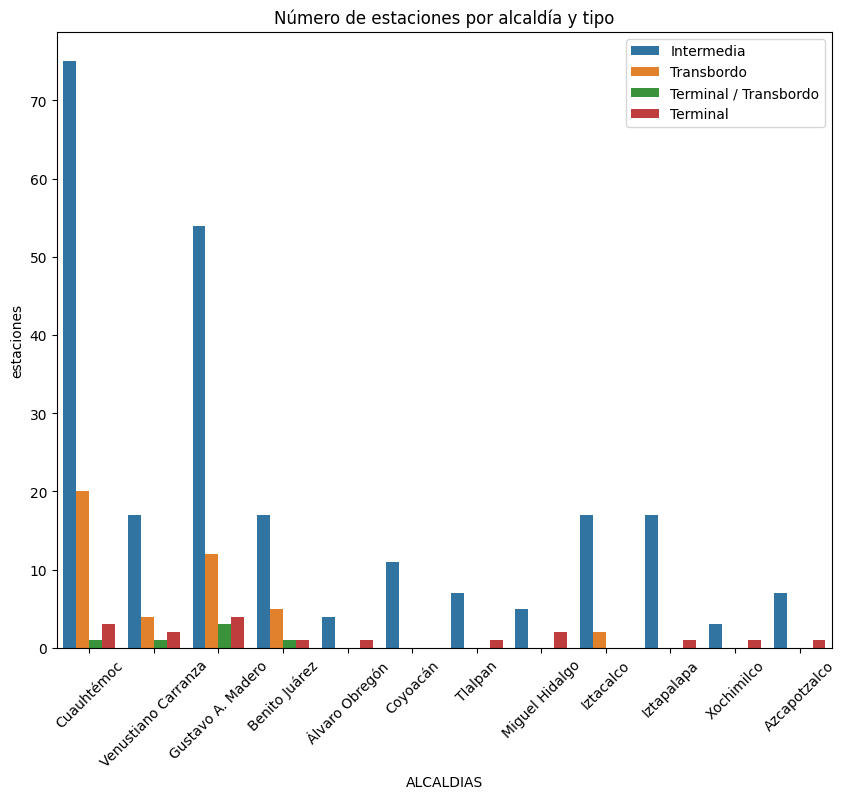

In [185]:
plt.figure(figsize=((10,8)))
fig=sns.barplot(data=mb, x="ALCALDIAS", y="NUM_ESTACIONES", hue="TIPO")
plt.xticks(rotation=45)
plt.legend(loc="upper right")
fig.set_title("Número de estaciones por alcaldía y tipo")
fig.set_ylabel("estaciones")
plt.show()

In [186]:
mb["ESTACIONES_TOTALES_MUN"]=mb.ALCALDIAS
mb.ESTACIONES_TOTALES_MUN=mb.ESTACIONES_TOTALES_MUN.map(dict(mb.ALCALDIAS.value_counts()))

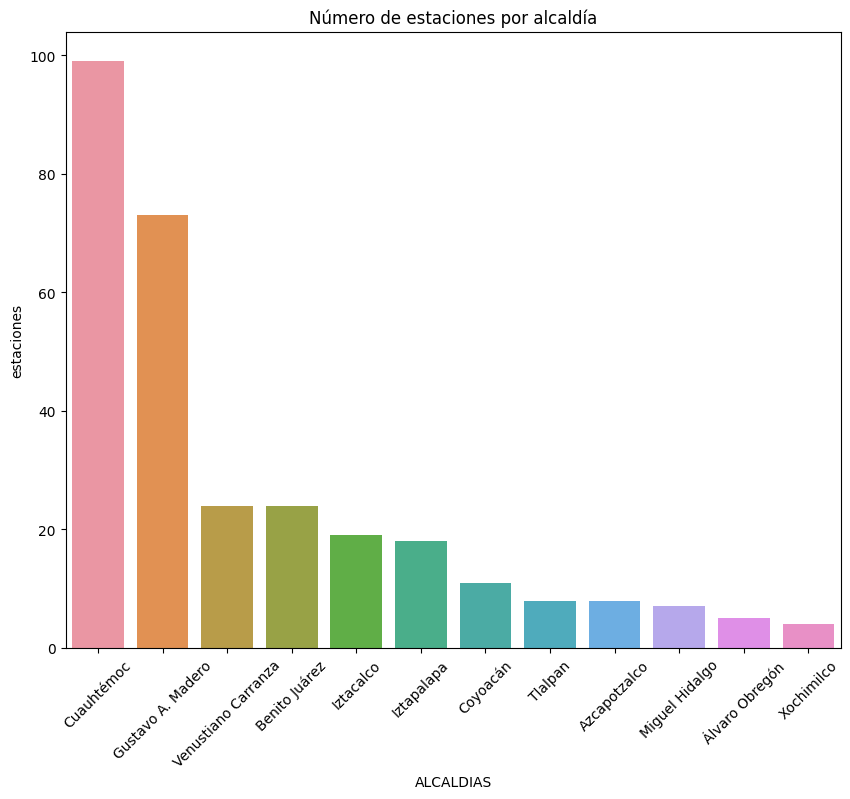

In [187]:
plt.figure(figsize=((10,8)))
fig=sns.barplot(data=mb, x="ALCALDIAS", y="ESTACIONES_TOTALES_MUN", order=mb.ALCALDIAS.value_counts(ascending=False).index)
plt.xticks(rotation=45)
fig.set_title("Número de estaciones por alcaldía")
fig.set_ylabel("estaciones")
plt.show()

In [188]:
alcaldias=mb.groupby("ALCALDIAS").groups.keys()
MB_Transbordo={}
MB_Terminal={}
MB_Terminal_Transbordo={}
MB_Intermedia={}

for alcaldia in alcaldias: 
    df_alcaldia=mb.groupby("ALCALDIAS").get_group(alcaldia)
    MB_Intermedia[alcaldia] = len(df_alcaldia.query("TIPO == 'Intermedia'"))
    MB_Terminal[alcaldia] = len(df_alcaldia.query("TIPO == 'Terminal'"))
    MB_Terminal_Transbordo[alcaldia] = len(df_alcaldia.query("TIPO == 'Terminal / Transbordo'"))
    MB_Transbordo[alcaldia] = len(df_alcaldia.query("TIPO == 'Transbordo'"))



In [189]:
mun["MB_Intermedia"]=mun.NOMGEO
mun["MB_Transbordo"]=mun.NOMGEO
mun["MB_Terminal_Transbordo"]=mun.NOMGEO
mun["MB_Terminal"]=mun.NOMGEO

mun["MB_Intermedia"]=mun["MB_Intermedia"].map(MB_Intermedia)
mun["MB_Transbordo"]=mun["MB_Transbordo"].map(MB_Transbordo)
mun["MB_Terminal_Transbordo"]=mun["MB_Terminal_Transbordo"].map(MB_Terminal_Transbordo)
mun["MB_Terminal"]=mun["MB_Terminal"].map(MB_Terminal)

mun.fillna(0, inplace=True)
mun=mun.astype({"MB_Intermedia":"int", "MB_Transbordo":"int", "MB_Terminal_Transbordo": "int", "MB_Terminal":"int"})
mun

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,OID,MB_Intermedia,MB_Transbordo,MB_Terminal_Transbordo,MB_Terminal
0,9003,9,3,Coyoacán,1,11,0,0,0
1,9007,9,7,Iztapalapa,2,17,0,0,1
2,9008,9,8,La Magdalena Contreras,3,0,0,0,0
3,9009,9,9,Milpa Alta,4,0,0,0,0
4,9010,9,10,Álvaro Obregón,5,4,0,0,1
5,9011,9,11,Tláhuac,6,0,0,0,0
6,9012,9,12,Tlalpan,7,7,0,0,1
7,9013,9,13,Xochimilco,8,3,0,0,1
8,9006,9,6,Iztacalco,9,17,2,0,0
9,9015,9,15,Cuauhtémoc,10,75,20,1,3


In [190]:
print(f"Alcaldías que no tienen MB: ")
for alcaldia in pd.unique(mun.NOMGEO).tolist():
    if alcaldia not in alcaldias:
        print(alcaldia)

Alcaldías que no tienen MB: 
La Magdalena Contreras
Milpa Alta
Tláhuac
Cuajimalpa de Morelos


In [191]:
mun["MB_tot"]=mun.MB_Intermedia + mun.MB_Terminal + mun.MB_Terminal_Transbordo + mun.MB_Transbordo
mun

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,OID,MB_Intermedia,MB_Transbordo,MB_Terminal_Transbordo,MB_Terminal,MB_tot
0,9003,9,3,Coyoacán,1,11,0,0,0,11
1,9007,9,7,Iztapalapa,2,17,0,0,1,18
2,9008,9,8,La Magdalena Contreras,3,0,0,0,0,0
3,9009,9,9,Milpa Alta,4,0,0,0,0,0
4,9010,9,10,Álvaro Obregón,5,4,0,0,1,5
5,9011,9,11,Tláhuac,6,0,0,0,0,0
6,9012,9,12,Tlalpan,7,7,0,0,1,8
7,9013,9,13,Xochimilco,8,3,0,0,1,4
8,9006,9,6,Iztacalco,9,17,2,0,0,19
9,9015,9,15,Cuauhtémoc,10,75,20,1,3,99


In [202]:
mun.to_csv("MB_alcaldias.csv", index=False)